In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
### MOVIE DATABASES ###

# Box Office Mojo by IMDb Pro
movie_gross_df = pd.read_csv('../data/zippedData/bom.movie_gross.csv.gz')

# IMDb
imdb_name_df = pd.read_csv('../data/zippedData/imdb.name.basics.csv.gz')
imdb_akas_df = pd.read_csv('../data/zippedData/imdb.title.akas.csv.gz')
imdb_basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
imdb_crew_df = pd.read_csv('../data/zippedData/imdb.title.crew.csv.gz')
imdb_principals_df = pd.read_csv('../data/zippedData/imdb.title.principals.csv.gz')
imdb_ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

# Rotten Tomatos
rt_movies_df = pd.read_csv('../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

# The Movie Database
tmdb_movies_df = pd.read_csv('../data/zippedData/tmdb.movies.csv.gz')

# The Numbers
tn_budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')

In [17]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
tn_budgets_df.production_budget

0       $425,000,000
1       $410,600,000
2       $350,000,000
3       $330,600,000
4       $317,000,000
            ...     
5777          $7,000
5778          $6,000
5779          $5,000
5780          $1,400
5781          $1,100
Name: production_budget, Length: 5782, dtype: object

In [6]:
imdb_crew_df.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [9]:
imdb_akas_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [8]:
us_akas = imdb_akas_df[imdb_akas_df['region'] == 'US']
us_akas.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0


In [48]:
test = us_akas.join(imdb_ratings_df.set_index('tconst'), on='title_id')
test2 = test[['title_id', 'title', 'attributes', 'averagerating', 'numvotes']]
test2.head()

,title_id,title,attributes,averagerating,numvotes
12,tt0369610,Jurassic World 3D,3-D version,7.0,539338.0
20,tt0369610,Jurassic World,NaN,7.0,539338.0
21,tt0369610,Ebb Tide,fake working title,7.0,539338.0
28,tt0369610,Jurassic Park IV,NaN,7.0,539338.0
37,tt0369610,Jurassic Park 4,informal alternative title,7.0,539338.0


In [56]:
imdb_name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [54]:
dir_prin = imdb_principals_df[imdb_principals_df['category'] == 'director']
dir_prin.head()
test3 = test2.join(dir_prin.set_index('tconst'), on='title_id')
test3.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters
12,tt0369610,Jurassic World 3D,3-D version,7.0,539338.0,5.0,nm1119880,director,NaN,NaN
20,tt0369610,Jurassic World,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN
21,tt0369610,Ebb Tide,fake working title,7.0,539338.0,5.0,nm1119880,director,NaN,NaN
28,tt0369610,Jurassic Park IV,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN
37,tt0369610,Jurassic Park 4,informal alternative title,7.0,539338.0,5.0,nm1119880,director,NaN,NaN


In [61]:
test4 = test3.join(imdb_name_df.set_index('nconst'), on='nconst')
test4.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
12,tt0369610,Jurassic World 3D,3-D version,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
20,tt0369610,Jurassic World,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
21,tt0369610,Ebb Tide,fake working title,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
28,tt0369610,Jurassic Park IV,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"
37,tt0369610,Jurassic Park 4,informal alternative title,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079"


In [64]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [65]:
test5 = test4.join(movie_gross_df.set_index('title'), on='title')
test5.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,studio,domestic_gross,foreign_gross,year
12,tt0369610,Jurassic World 3D,3-D version,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",NaN,NaN,NaN,NaN
20,tt0369610,Jurassic World,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",Uni.,652300000.0,"1,019.4",2015.0
21,tt0369610,Ebb Tide,fake working title,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",NaN,NaN,NaN,NaN
28,tt0369610,Jurassic Park IV,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",NaN,NaN,NaN,NaN
37,tt0369610,Jurassic Park 4,informal alternative title,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",NaN,NaN,NaN,NaN


In [70]:
test5[['primary_name','domestic_gross']].isna().value_counts()

primary_name  domestic_gross
False         True              49252
True          True               6763
False         False              2033
True          False               112
dtype: int64

In [86]:
test6 = test5.dropna(subset=['primary_name','domestic_gross'])
test6['primary_name'].value_counts()

Woody Allen         6
Clint Eastwood      6
Steven Spielberg    6
Denis Villeneuve    6
Nicholas Stoller    5
                   ..
Kim Beavers         1
Barry Levinson      1
Stiles White        1
Stéphanie Chuat     1
Silas Pons          1
Name: primary_name, Length: 1460, dtype: int64

In [87]:
test6.head()

,title_id,title,attributes,averagerating,numvotes,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,studio,domestic_gross,foreign_gross,year
20,tt0369610,Jurassic World,NaN,7.0,539338.0,5.0,nm1119880,director,NaN,NaN,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",Uni.,652300000.0,"1,019.4",2015.0
70,tt0401729,John Carter,NaN,6.6,241792.0,5.0,nm0004056,director,NaN,NaN,Andrew Stanton,1965.0,NaN,"writer,actor,producer","tt0120623,tt0266543,tt2277860,tt0910970",BV,73100000.0,211100000,2012.0
223,tt1194173,The Bourne Legacy,NaN,6.7,268678.0,5.0,nm0006904,director,NaN,NaN,Tony Gilroy,1956.0,NaN,"producer,writer,director","tt1135487,tt0465538,tt3748528,tt2872718",Uni.,113200000.0,162900000,2012.0
260,tt1219289,Limitless,NaN,7.4,492490.0,5.0,nm1139726,director,NaN,NaN,Neil Burger,1963.0,NaN,"director,writer,producer","tt0443543,tt1219289,tt1840309,tt0308411",Rela.,79200000.0,82600000,2011.0
271,tt1223236,African Cats,NaN,7.6,5784.0,4.0,nm0774582,director,NaN,NaN,Keith Scholey,NaN,NaN,"producer,director,writer","tt6332994,tt10055028,tt0123360,tt1223236",BV,15400000.0,15400000,2011.0


In [98]:
test7 = test6.groupby('primary_name').mean('domestic_gross')
top_20_dir = test7.domestic_gross.sort_values(ascending=False)[:20]
top_20_dir

primary_name
Joss Whedon          541200000.0
Gareth Edwards       532200000.0
Anthony Russo        506375000.0
Joe Russo            506375000.0
Angus MacLane        486300000.0
Patty Jenkins        412600000.0
Michael Colburn      412600000.0
Jennifer Lee         400700000.0
Adam Green           400700000.0
Chris Buck           400700000.0
Ryan Coogler         381525000.0
Tim Miller           363100000.0
Artie Mandelberg     356500000.0
Pete Docter          356500000.0
Ronnie Del Carmen    356500000.0
J.J. Abrams          354875000.0
Rian Johnson         343350000.0
Jared Bush           341300000.0
Colin Trevorrow      328150000.0
Andy Muschietti      327500000.0
Name: domestic_gross, dtype: float64

<AxesSubplot:xlabel='primary_name'>

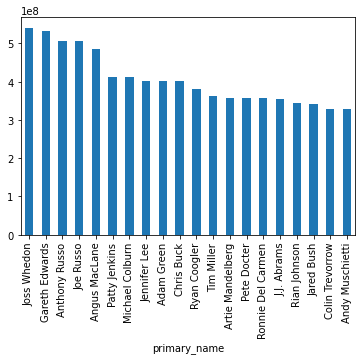

In [99]:
top_20_dir.plot(kind='bar')

In [5]:
rt_movies_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [20]:
rt_movies_df.synopsis.isna().value_counts()

False    1498
True       62
Name: synopsis, dtype: int64

In [21]:
test = rt_movies_df.dropna()
len(test)

235

In [65]:
joined = rt_reviews_df.set_index('id').join(rt_movies_df.rename(columns={'rating':'mpa_rating'}).set_index('id'), how='inner')
joined.head()

,review,rating,fresh,critic,top_critic,publisher,date,synopsis,mpa_rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


<AxesSubplot:>

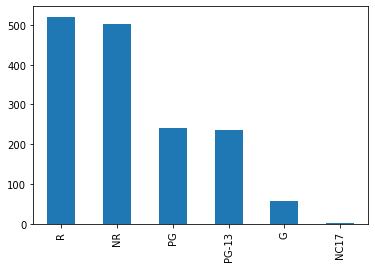

In [79]:
rt_movies_df.rating.value_counts().plot(kind='bar')

In [81]:
rt_movies_df.director.value_counts()[:25]

Steven Spielberg      10
Clint Eastwood         8
Yimou Zhang            4
William Friedkin       4
Alfred Hitchcock       4
William Beaudine       4
Jim Jarmusch           4
Woody Allen            4
Curtis Hanson          4
Bruce Beresford        4
Ridley Scott           4
Barry Levinson         4
Peter Bogdanovich      3
Ang Lee                3
Richard Linklater      3
Neil Jordan            3
Boris Sagal            3
Charles Walters        3
David Lean             3
Fritz Lang             3
Anatole Litvak         3
Sylvester Stallone     3
Werner Herzog          3
George Sidney          3
Joseph Ruben           3
Name: director, dtype: int64

In [84]:
group_dir = rt_movies_df.set_index('director').groupby('director')
group_dir.head()

,id,synopsis,rating,genre,writer,theater_date,dvd_date,currency,box_office,runtime,studio
director,,,,,,,,,,,
William Friedkin,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
David Cronenberg,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
Allison Anders,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
Barry Levinson,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
Rodney Bennett,7,NaN,NR,Drama|Romance,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...
James Lapine,1993,A former child actor turned talent agent is hi...,PG,Comedy,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
Barry Sonnenfeld,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
Steve Barron,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage


In [85]:
rt_movies_df.box_office.value_counts()

200,000       2
20,900,803    2
600,000       2
32,000,000    2
793,352       1
             ..
19,755,422    1
410,077       1
2,027,042     1
14,443,077    1
43,800,000    1
Name: box_office, Length: 336, dtype: int64

In [88]:
dropped = rt_movies_df.dropna('box_office')
# dropped.box_office.value_counts()

ValueError: No axis named box_office for object type DataFrame